In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib
from ChildProject.projects import ChildProject
from ChildProject.annotations import AnnotationManager

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.serif'] = 'Arial'
matplotlib.rcParams.update({'font.size': 12, 'legend.handleheight':1, 'hatch.linewidth': 1.0,
                           'lines.markersize':4, 'lines.linewidth':1})

project = ChildProject('/home/engaclew/DATA/neurogen/L3_HIPAA_LENA_cleaned')
am = AnnotationManager(project)
speakers = ['CHI', 'OCH', 'MAL', 'FEM']
am.read()
intersection = AnnotationManager.intersection(am.annotations, ['vtc', 'its'])

groups = {'low_risk': 'Low risk', 'all': 'All groups', 'angelman_syndrome': 'Angelman syndrome', 
          'autism_sibling': 'Sibling(s) with autism', 'autism_spectrum_disorder': 'Autism spectrum disorder',
          'down_syndrome': 'Down syndrome', 'environmental_risk': 'Environmental risks', 'fragile_x_syndrome': 'Fragile X syndrome',}

/home/engaclew/miniconda3/envs/neurogen/lib/python3.10/site-packages/ChildProject/annotations.py:1519: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annotations["duration"] = (
/home/engaclew/miniconda3/envs/neurogen/lib/python3.10/site-packages/ChildProject/annotations.py:1468: DtypeWarning: Columns (2,7,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


                     sum   count
speaker_type                    
CHI           151.814917  297987
FEM           176.902672  318446
OCH            87.063345  251244
MAL            83.047988  169394
                    sum   count
speaker_type                   
CHI           79.586197  258068
FEM           80.706631  203100
OCH           52.786011  166308
MAL           34.763006   79889


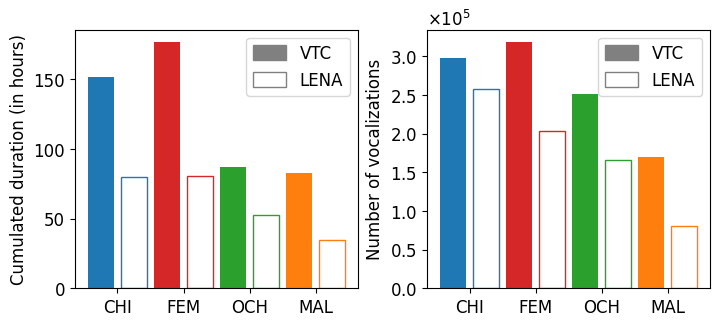

/home/engaclew/miniconda3/envs/neurogen/lib/python3.10/site-packages/ChildProject/annotations.py:1468: DtypeWarning: Columns (2,7,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(
/home/engaclew/miniconda3/envs/neurogen/lib/python3.10/site-packages/ChildProject/annotations.py:1468: DtypeWarning: Columns (2,7,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(
/home/engaclew/miniconda3/envs/neurogen/lib/python3.10/site-packages/ChildProject/annotations.py:1468: DtypeWarning: Columns (7,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(
/home/engaclew/miniconda3/envs/neurogen/lib/python3.10/site-packages/ChildProject/annotations.py:1468: DtypeWarning: Columns (2,7,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(
/home/engaclew/miniconda3/envs/neurogen/lib/python3.10/site-packages/ChildProject/

In [ ]:
# Plot summary statistics: cumulated duration per speaker and voc. count
def plot_summary(vtc, its, title=None, save=None):
    cm = 1/2.54
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18*cm,8*cm), constrained_layout=True)
    vtc = vtc.reindex(['CHI', 'FEM', 'OCH', 'MAL'])
    its = its.reindex(['CHI', 'FEM', 'OCH', 'MAL'])
    print(vtc)
    print(its)
    
    ax1.bar(x=[0,2,4,6], height=vtc['sum'], label='VTC', color=['tab:blue', 'tab:red', 'tab:green', 'tab:orange'])
    ax1.bar(x=[1,3,5,7], height=its['sum'], label='LENA', edgecolor=['tab:blue', 'tab:red', 'tab:green', 'tab:orange'], fill = True, facecolor='white')
    ax1.set_xticks([.5,2.5,4.5,6.5])
    ax1.set_xticklabels(vtc.index)
    ax1.set_ylabel('Cumulated duration (in hours)')
    

    ax2.bar(x=[0,2,4,6], height=vtc['count'], label='VTC', color=['tab:blue', 'tab:red', 'tab:green', 'tab:orange'])
    ax2.bar(x=[1,3,5,7], height=its['count'], label='LENA', edgecolor=['tab:blue', 'tab:red', 'tab:green', 'tab:orange'], fill = True, facecolor='white')
    ax2.set_xticks([.5,2.5,4.5,6.5])
    ax2.set_xticklabels(vtc.index)
    ax2.set_ylabel('Number of vocalizations')
    ax2.ticklabel_format(axis='y', style='scientific', scilimits=(0,0), useMathText=True)

    ax1.legend()
    leg = ax1.get_legend()
    leg.legend_handles[0].set_color('grey')
    leg.legend_handles[1].set_edgecolor('grey')
    ax2.legend()
    leg = ax2.get_legend()
    leg.legend_handles[0].set_color('grey')
    leg.legend_handles[1].set_edgecolor('grey')
    if title is not None:
        plt.title(title)
    if save is not None:
        plt.savefig(save, dpi=300)
    plt.show()

for group_id, title in groups.items():
    if group_id == 'all':
        group_intersection = intersection
    else:
        authorized_child_ids = project.children.loc[project.children['group_id'] == group_id, 'child_id'].unique()
        authorized_recordings = project.recordings.loc[project.recordings['child_id'].isin(authorized_child_ids), 'recording_filename'].unique()
        group_intersection = intersection[intersection['recording_filename'].isin(authorized_recordings)]
    segments = am.get_collapsed_segments(group_intersection)
    segments['seg_dur'] = (segments['segment_offset'] - segments['segment_onset'])/3600000
    vtc = segments[segments['set'] == 'vtc']
    vtc = vtc.groupby('speaker_type')['seg_dur'].agg(['sum', 'count'])
    its = segments[segments['set'] == 'its']
    its = its.groupby('speaker_type')['seg_dur'].agg(['sum', 'count'])
    plot_summary(vtc, its, save=Path('../results/summary') / f'summary_{group_id}.png')
    


[[ 2286178   790572    31650   251343  2105375]
 [  490060   879728    10689    86749  1666629]
 [   51925    40450   909242   357057  1630589]
 [  264617   410342   165181  2343029  3185008]
 [  252631   256706   234586   217635 39804439]]
[ 5465118  3133855  2989263  6368177 40765997]


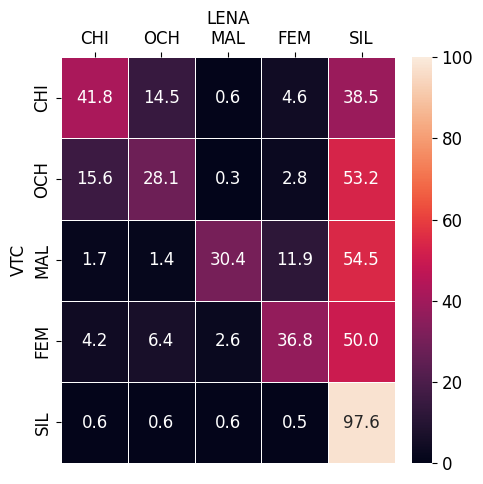

[[  6417891   2395253    110766    884096   6231067]
 [  1378477   3178092     40273    349726   6281652]
 [   170480    156466   3086651   1269449   5803566]
 [  1032409   1636135    590490   8134276  11428954]
 [   814062    992874    845680    805160 129233149]]
[ 16039073  11228220  10486612  22822264 132690925]


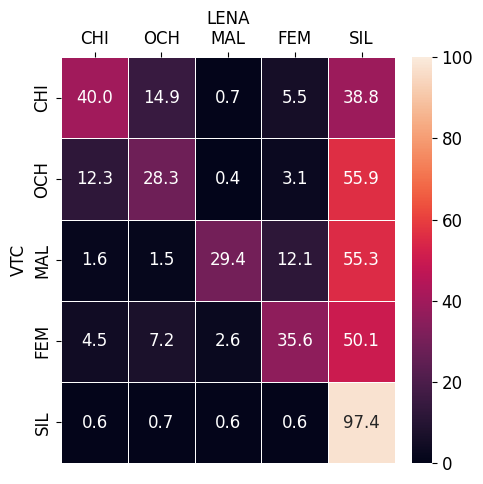

[[  926956   420542    23235   176838  1054159]
 [  161144   645117     8335    76101  1350557]
 [   26749    31059   694749   321952  1453006]
 [  232334   369882   165349  1979751  2965119]
 [  145239   221682   241732   207051 31794854]]
[ 2601730  2241254  2527515  5712435 32610558]


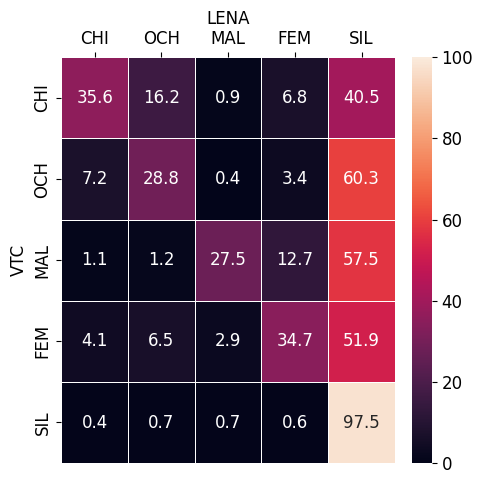

[[ 507881  163766    7111   46608  431258]
 [ 104707  244840    3239   21501  470103]
 [  11018   12876  216965   89842  373551]
 [  54574  101984   38111  400375  617448]
 [  50986   77860   50923   45032 7513193]]
[1156624  844390  704252 1212492 7737994]


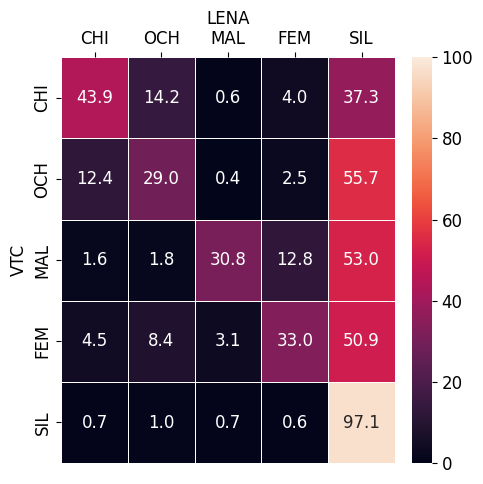

[[ 45951  26577    440   4493  43833]
 [ 14897  27941    189   2201  52536]
 [  1267   1309  16438   9279  42187]
 [  7465   9745   2697  34213  69593]
 [  4598   6100   3130   3397 783745]]
[121294  97764  70480 123713 800970]


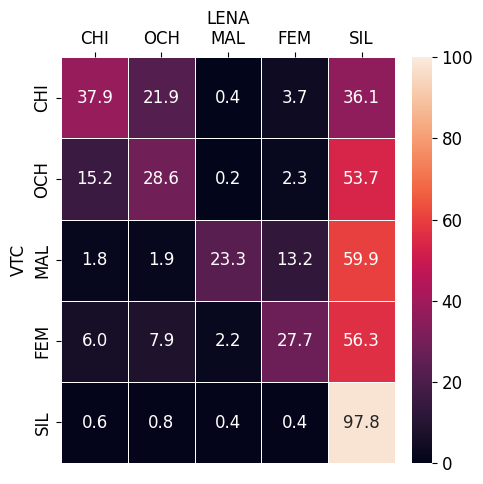

[[ 1704644   642257    32238   266902  1759694]
 [  338329   962486    12990   108110  1883913]
 [   45747    44224   838805   335395  1567145]
 [  278654   514699   155017  2312477  3226968]
 [  214837   280358   237565   230085 34192145]]
[ 4405735  3305828  2831316  6487815 35154990]


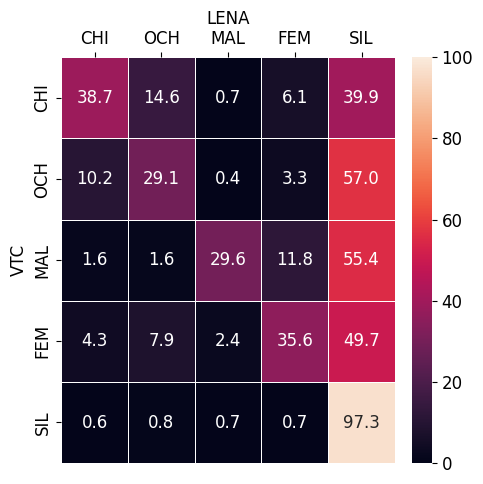

[[ 59808  24666    247   9021  39676]
 [ 19893  30399    102   3462  43857]
 [   816   1697  13282   9631  31737]
 [ 19058  17077   1554  56633  81832]
 [  4699   6641   1428   3591 746688]]
[133418  97713  57163 176154 763047]


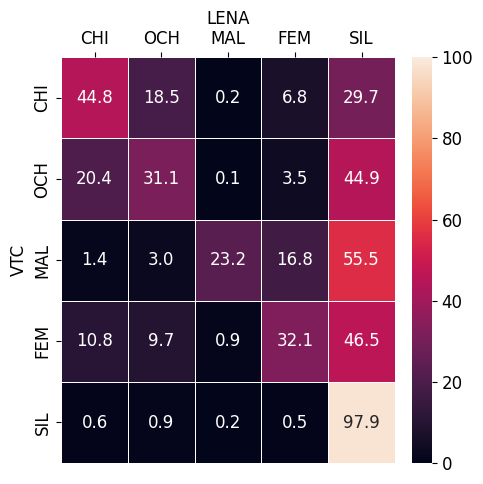

[[  886887   327484    15968   128993   800266]
 [  249852   388296     4672    51862   815867]
 [   32723    24551   397297   146266   704273]
 [  176103   212130    62488  1006505  1284631]
 [  140865   142911    76535    98443 14392987]]
[ 2159598  1510549  1305110  2741857 14851741]


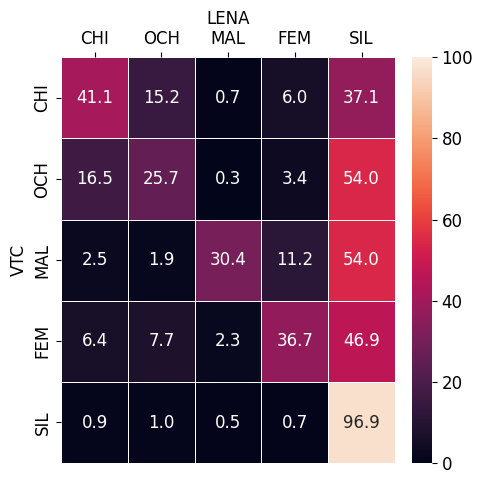

In [15]:
# Plot confusion matrices
def plot_conf(conf, norm=0, title=None, save=None):
    print(conf)
    print(conf.sum(axis=1))
    if norm == 0:
        conf = 100*conf / conf.sum(axis=0)
    elif norm == 1:
        conf = 100*conf / conf.sum(axis=1)[:, np.newaxis]
    cm = 1/2.54
    fig, ax = plt.subplots(1,1, figsize=(12*cm,12*cm), constrained_layout=True)
    sn.heatmap(conf, annot=True, ax=ax,fmt=".1f",linewidth=.5, vmin=0, vmax=100)
    ax.set_yticklabels(['CHI', 'OCH', 'MAL', 'FEM', 'SIL'])
    ax.set_xticklabels(['CHI', 'OCH', 'MAL', 'FEM', 'SIL'])
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.set_ylabel('VTC')
    ax.set_xlabel('LENA')
    if title is not None:
        ax.set_title(title)
    if save is not None:
        plt.savefig(save, dpi=300)
    plt.show()

for group_id, title in groups.items():
    result_path = Path('../results') / 'conf' / f'conf_{group_id}.npy'
    conf = np.load(result_path)
    plot_conf(conf, norm=1, save=Path('../results/conf') / f'conf_{group_id}_its_norm.png')
